<a href="https://colab.research.google.com/github/CalebaR/MAT-421/blob/main/ModuleC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**19.1: Root Finding Problem Statement**\
The root of the a function is where y = 0 or f(x) = 0. A function may have 0 roots or many roots. Some function have roots that are very easy to find directly or with a formula. But many functions have roots that are not possible to find directly. There can be approximations with various methods

root = [0.73908513]
result= [0.]


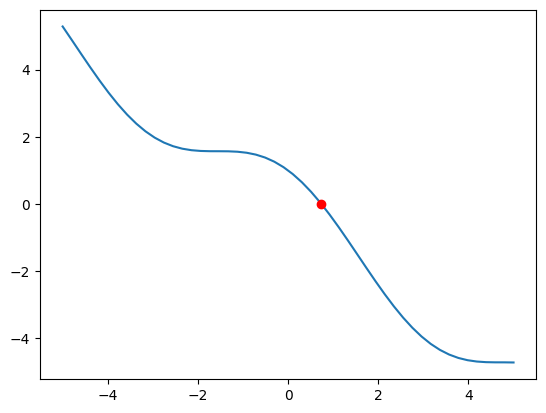

In [81]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import optimize

# Finding the root of cos(x) - x

x = np.linspace(-5,5) #x values between -5 and 5
y = np.cos(x) - x #function y = cos(x) - x
plt.plot(x,y)

f = lambda x: np.cos(x) - x
root = optimize.fsolve(f, -2) #fsolve function finds the roots of non linear equations
print("root =", root)

# Verify the solution is a root
fRoot = f(root)
print("result=", fRoot)
plt.plot(root,0,'or'); #plotting the root

r = [-3.52047359e+83]
result= [-2.84052692e-84]


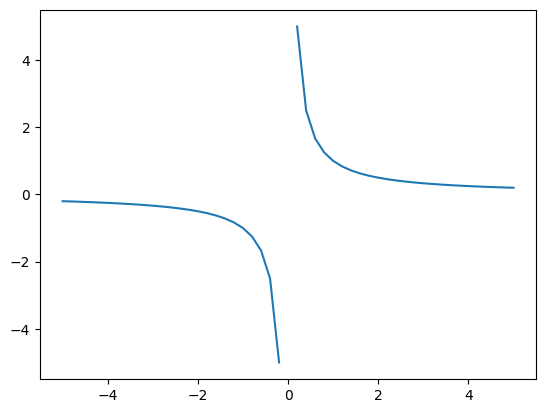

In [82]:
#Finding the root of 1/x

#plotting 1/x
x = np.linspace(-5,5,51) #x values between -5 and 5
def f(x):
    with np.errstate(divide='ignore', invalid='ignore'):
        return 1/x #function y = 1/x
y = f(x)
plt.plot(x,y); #the plot shows that 1/x = 0 has no solution.

f = lambda x: 1/x

root = optimize.fsolve(f, -2)
print("r =", root)

result = f(root) #we can see the root is incorrect
print("result=", result)

**19.2: Tolerance**\
Tolerance is the amount of error that is accepted. It is chosen by a person. For example, a thermometer manufacturer might have a tolerance of &plusmn; 2&deg;F accuracy for thermometers they sell. Tolerance for root finding can be straight foward. Since we know the root is when f(x) = 0, we want f(root) to be as close to zero as possible or f(root)&#8776;0.

**19.3: Bisection Method**\
The bisection method is an iterative method to find the root between a and b. $m=\frac{b+a}{2}$ is the midpoint between a and b. If f(m) = 0 then m is the root. If f(m) > 0 or f(m) < 0 then m needs to be iterated in the correct direction.\
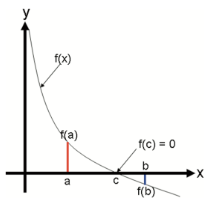

0.999755859375
0.04833406208490487
0.9999847412109375
0.0030212176498025656
100.0


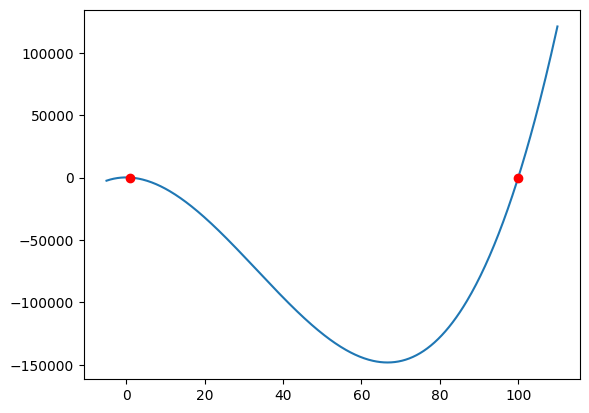

In [83]:
#this is the bisection function from the book

def my_bisection(f, a, b, tol):
    # approximates a root, R, of f bounded
    # by a and b to within tolerance
    # | f(m) | < tol with m the midpoint
    # between a and b Recursive implementation

    # check if a and b bound a root
    if np.sign(f(a)) == np.sign(f(b)):
        raise Exception(
         "The scalars a and b do not bound a root")

    # get midpoint
    m = (a + b)/2

    if np.abs(f(m)) < tol:
        # stopping condition, report m as root
        return m
    elif np.sign(f(a)) == np.sign(f(m)):
        # case where m is an improvement on a.
        # Make recursive call with a = m
        return my_bisection(f, m, b, tol)
    elif np.sign(f(b)) == np.sign(f(m)):
        # case where m is an improvement on b.
        # Make recursive call with b = m
        return my_bisection(f, a, m, tol)

# lets test a function

x = np.linspace(-5, 110, 500)
y = x**3-100*x**2-x+100
plt.plot(x,y)
# the function appears to have roots at around x=0 and x=100

f = lambda x: x**3-100*x**2-x+100

print(my_bisection(f, 0, 5, 0.1))
print(f(my_bisection(f, 0, 5, 0.1))) #testing how close to 0
print(my_bisection(f, 0, 5, 0.01))
print(f(my_bisection(f, 0, 5, 0.01))) #testing with better tolerance

print(my_bisection(f, 95, 105, 0.01))
f(my_bisection(f, 95, 105, 0.01))

plt.plot(my_bisection(f, 0, 5, 0.01),0,'or')
plt.plot(my_bisection(f, 95, 105, 0.01),0,'or');

**19.4: Newton-Raphson Method**\
This method requires an initial guess that is "close enough" to the root. This guess will be used to find a linear approximation to the distance to the x axis. This distance should be 0\
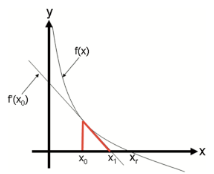

100.0
1.0000034785556002


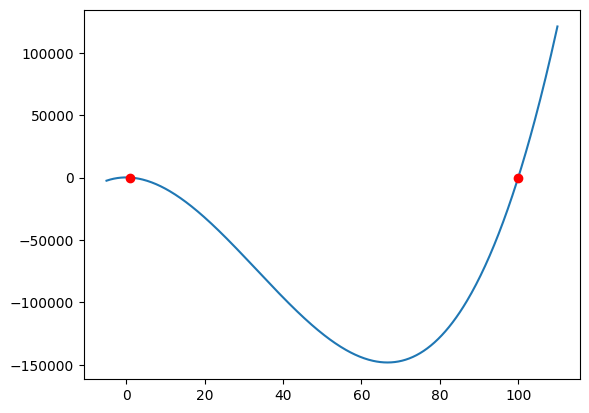

In [84]:
def my_newton(f, df, x0, tol):
    # output is an estimation of the root of f
    # using the Newton Raphson method
    # recursive implementation
    # f is function. df is the derivative of f
    # x0 is the initial guess
    if abs(f(x0)) < tol:
        return x0
    else:
        return my_newton(f, df, x0 - f(x0)/df(x0), tol)

x = np.linspace(-5, 110, 500)
y = x**3-100*x**2-x+100
plt.plot(x,y)

f = lambda x: x**3-100*x**2-x+100
deriv = lambda x: 3*x**3 - 200*x -1

print(my_newton(f,deriv,0,0.1)) # initial guess of 0 gives root of 100 when there is a root at 1
print(my_newton(f,deriv,3,0.1)) # initial guess of 3 gives root of 1 when there is a root at 100

plt.plot(my_newton(f,deriv,0,0.1),0,'or')
plt.plot(my_newton(f,deriv,3,0.1),0,'or');

**19.5: Root Finding in Python**\
This is the function fsolve from scipy.optimize. It is the same thing used in section 19.1.

In [85]:
f = lambda x: x**3-100*x**2-x+100

print(optimize.fsolve(f, [2, 80])) #array [2,80] are estimation values for the roots. It is required

print(optimize.fsolve(f, [0, 120])) #the estimation values have to be somewhat accurate. this is wrong
print(optimize.fsolve(f, [10, 50])) #this is wrong

[  1. 100.]
[100. 100.]
[1. 1.]
